In [93]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [94]:
def origin(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    #     oecd_bli (37, 24)
    #     gdp_per_capita (190, 6)
    #     full_country_stats (36, 30)
    # merge: coincide index
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    keep_indices = list(range(full_country_stats.shape[0]))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    #     oecd_bli (37, 24)
    #     gdp_per_capita (190, 6)
    #     full_country_stats (36, 30)
    # merge: coincide index
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
#     keep_indices = list(range(full_country_stats.shape[0]))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

def prepare_country_stats_custom(oecd_bli, feature, name):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    feature.rename(columns={"Value": name}, inplace=True)
    feature.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=tech,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by=name, inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
#     keep_indices = list(range(full_country_stats.shape[0]))
    return full_country_stats[[name, 'Life satisfaction']].iloc[keep_indices] 

def prepare_country_stats_sat(sat, gdp_per_capita, name):
    sat.rename(columns={"Value": name}, inplace=True)
    sat.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=sat, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
#     keep_indices = list(range(full_country_stats.shape[0]))
    return full_country_stats[["GDP per capita", name]].iloc[keep_indices] 

In [95]:
import os
datapath= os.path.join("datasets", "lifesat", "")

gdp:  Index(['Subject Descriptor', 'Units', 'Scale', '2013', '2014',
       'GDP per capita', 'Estimates Start After'],
      dtype='object')
gdp:  Index(['Subject Descriptor', 'Units', 'Scale', '2013', '2014',
       'GDP per capita', 'Estimates Start After'],
      dtype='object')
gdp:  Index(['Subject Descriptor', 'Units', 'Scale', '2013', '2014',
       'GDP per capita', 'Estimates Start After'],
      dtype='object')
2015 gdp mean 38349.55534482758
2014 gdp mean 37351.491137931036
t0: 4.527006194576426
t1 5.423505796732108e-05
[[5.75201345]]
[[44.45285895]]
[[10.62836529]]


E:\Users\63092\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


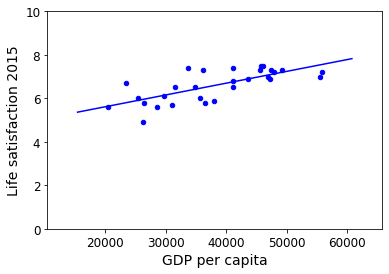

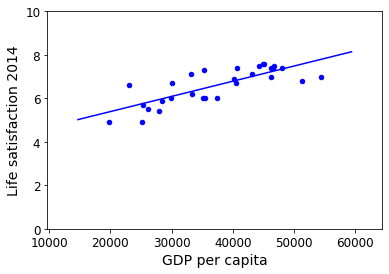

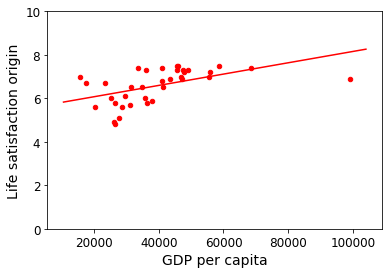

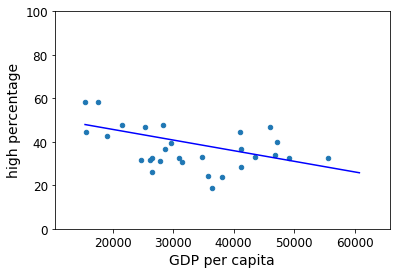

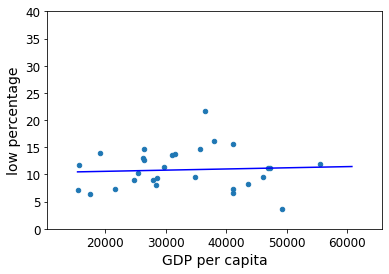

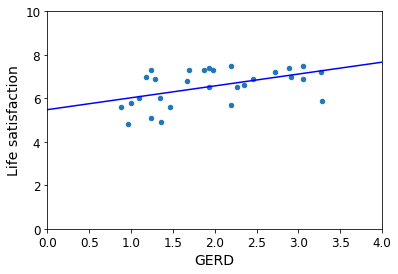

2013 gdp mean 36293.37434482759


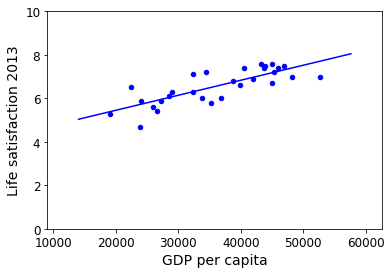

2013 mean 6.575862068965518 mse 0.6025208085612366
2014 mean 6.60344827586207 mse 0.6541260404280617
2015 mean 6.606896551724137 mse 0.5034007134363854


In [103]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import math

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli_2014 = pd.read_csv(datapath + "oecd_bli_2014.csv", thousands=',')
oecd_bli_2013 = pd.read_csv(datapath + "oecd_bli_2013.csv", thousands=',')
gdp_per_capita_2015 = pd.read_csv(datapath + "WEO_Data.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita_2014 = pd.read_csv(datapath + "WEO_Data.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita_2013 = pd.read_csv(datapath + "WEO_Data.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

tech = pd.read_csv(datapath + "GERD.csv", thousands = ',',delimiter=',')
ado_sat = pd.read_csv(datapath + "ado_sat.csv", thousands=',', delimiter=',')

ado_sat.set_index("Indicator", inplace=True)
high_sat = ado_sat.loc["Adolescents (15-year-olds) reporting high life satisfaction (%)"]
low_sat = ado_sat.loc["Adolescents (15-year-olds) reporting low life satisfaction (%)"]

# ado_sat.set_index("Country", inplace=True)  --> done in prepare
# high_sat.set_index("Country", inplace=True)
# low_sat.set_index("Country", inplace=True)

# Prepare the data
gdp_per_capita_2015.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita_2015.set_index("Country", inplace=True)
gdp_per_capita_2014.rename(columns={"2014": "GDP per capita"}, inplace=True)
gdp_per_capita_2014.set_index("Country", inplace=True)
gdp_per_capita_2013.rename(columns={"2013": "GDP per capita"}, inplace=True)
gdp_per_capita_2013.set_index("Country", inplace=True)

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita_2015)
country_stats_2014 = prepare_country_stats(oecd_bli_2014, gdp_per_capita_2014)
print("gdp: ", gdp_per_capita_2015.columns)
high_stats = prepare_country_stats_sat(high_sat, gdp_per_capita_2015, "high_per")
print("gdp: ", gdp_per_capita_2015.columns)
low_stats = prepare_country_stats_sat(low_sat, gdp_per_capita_2015, "low_per")
print("gdp: ", gdp_per_capita_2015.columns)
tech_stats = prepare_country_stats_custom(oecd_bli, tech, "GERD")
origin_stats = origin(oecd_bli, gdp_per_capita_2015)
X_origin = np.c_[origin_stats["GDP per capita"]]
y_origin = np.c_[origin_stats["Life satisfaction"]]
X_tech = np.c_[tech_stats["GERD"]]
y_tech = np.c_[tech_stats["Life satisfaction"]]
X = np.c_[country_stats["GDP per capita"]]
print("2015 gdp mean", X.mean())
y = np.c_[country_stats["Life satisfaction"]]
X_2014 = np.c_[country_stats_2014["GDP per capita"]]
print("2014 gdp mean", X_2014.mean())
y_2014 = np.c_[country_stats_2014["Life satisfaction"]]
X_high = np.c_[high_stats["GDP per capita"]]
y_high = np.c_[high_stats["high_per"]]
X_low = np.c_[low_stats["GDP per capita"]]
y_low = np.c_[low_stats["low_per"]]

# Select a linear model
model_high = linear_model.LinearRegression()
model_low = linear_model.LinearRegression()
model = linear_model.LinearRegression()
model_2014 = linear_model.LinearRegression()
model_origin = linear_model.LinearRegression()
model_tech = linear_model.LinearRegression()

# Train the model
model.fit(X, y)
model_2014.fit(X_2014, y_2014)
model_origin.fit(X_origin, y_origin)
model_high.fit(X, y_high)
model_low.fit(X, y_low)
model_tech.fit(X_tech, y_tech)

t0, t1 = model.intercept_[0], model.coef_[0][0]
t0_2014, t1_2014 = model_2014.intercept_[0], model_2014.coef_[0][0]
print("t0:", t0)
print("t1", t1)
t0_origin, t1_origin = model_origin.intercept_[0], model_origin.coef_[0][0]
t0_high, t1_high = model_high.intercept_[0], model_high.coef_[0][0]
t0_low, t1_low = model_low.intercept_[0], model_low.coef_[0][0]
t0_tech, t1_tech = model_tech.intercept_[0], model_tech.coef_[0][0]

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]
print(model_high.predict(X_new))
print(model_low.predict(X_new))

# Visualize the data
X=np.linspace(min(X)-5000, max(X)+5000, 1000)
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', color='b')
plt.ylabel("Life satisfaction 2015")
plt.axis([min(X)-5000, max(X)+5000, 0, 10])
plt.plot(X, t0 + t1*X, "b")
plt.show()

X_2014 = np.linspace(min(X_2014)-5000, max(X_2014)+5000, 1000)
country_stats_2014.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', color='b')
plt.ylabel("Life satisfaction 2014")
plt.axis([min(X_2014)-5000, max(X_2014)+5000, 0, 10])
plt.plot(X_2014, t0_2014 + t1_2014*X_2014, "b")
plt.show()

# plt.axis([0, 100000, 0, 10])
X_origin = np.linspace(min(X_origin)-5000, max(X_origin)+5000, 1000)
origin_stats.plot(kind = 'scatter', x="GDP per capita", y='Life satisfaction', color='r')
plt.ylabel("Life satisfaction origin")
plt.axis([min(X_origin)-5000, max(X_origin)+5000, 0, 10])
plt.plot(X_origin, t0_origin + t1_origin*X_origin, "r")
plt.show()

high_stats.plot(kind='scatter', x="GDP per capita", y="high_per")
plt.ylabel("high percentage")
plt.axis([min(X)-5000, max(X)+5000, 0, 100])
plt.plot(X, t0_high + t1_high*X, "b")
plt.show()

low_stats.plot(kind='scatter', x="GDP per capita", y="low_per")
plt.ylabel("low percentage")
plt.axis([min(X)-5000, max(X)+5000, 0, 40])
plt.plot(X, t0_low + t1_low*X, "b")
plt.show()

X = np.linspace(0, 4, 100)
tech_stats.plot(kind='scatter', x="GERD", y="Life satisfaction")
plt.axis([0, 4, 0, 10])
plt.plot(X, t0_tech + t1_tech*X, "b")
plt.show()

oecd_bli_2013 = pd.read_csv(datapath + "oecd_bli_2013.csv", thousands=',')
country_stats_2013 = prepare_country_stats(oecd_bli_2013, gdp_per_capita_2013)
X_2013 = np.c_[country_stats_2013["GDP per capita"]]
print("2013 gdp mean", X_2013.mean())
y_2013 = np.c_[country_stats_2013["Life satisfaction"]]
model_2013 = linear_model.LinearRegression()
model_2013.fit(X_2013, y_2013)
t0_2013, t1_2013 = model_2013.intercept_[0], model_2013.coef_[0][0]
X_2013 = np.linspace(min(X_2013)-5000, max(X_2013)+5000, 1000)
country_stats_2013.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', color='b')
plt.ylabel("Life satisfaction 2013")
plt.axis([min(X_2013)-5000, max(X_2013)+5000, 0, 10])
plt.plot(X_2013, t0_2013 + t1_2013*X_2013, "b")
plt.show()

print("2013 mean", y_2013.mean(), "mse", ((y_2013 - y_2013.mean())**2).mean())
print("2014 mean", y_2014.mean(), "mse", ((y_2014 - y_2014.mean())**2).mean())
print("2015 mean", y.mean(), "mse", ((y - y.mean())**2).mean())